Q1. Scipy:

We have the min and max temperatures in a city In India for each months of the year.

We would like to find a function to describe this and show it graphically, the dataset

given below.
Task:

1.fitting it to the periodic function
2.plot the fit
Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

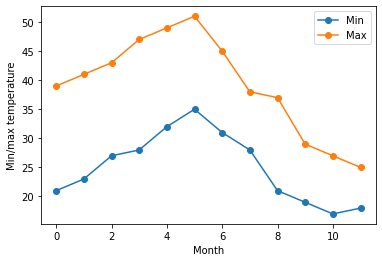

In [19]:
import numpy as np
import spacy
import matplotlib.pyplot as plt

mon_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
mon_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

plt.plot(months, mon_min, marker='o')
plt.plot(months, mon_max, marker='o')
plt.xlabel('Month')
plt.legend(['Min', 'Max'])
plt.ylabel('Min/max temperature')
plt.show()

Fitting and using Spacy

In [41]:
from scipy import optimize

def temperature_per_month(temp_array, avg, ampl, offset):
    return avg + ampl * np.cos((temp_array + offset) *2 * np.pi /  temp_array.max())

temp_max_res, tem_max_cov = optimize.curve_fit(temperature_per_month, months, mon_max, [38, 53, 0])#[mon_max.max(), np.average(mon_max), mon_max.min()]
temp_min_res, tem_max_cov = optimize.curve_fit(temperature_per_month, months, mon_min, [22, 35, 0])

print(res_max)
print(res_min)

[ 39.88861733 -10.59083157  23.33370156]
[25.55626462  7.74472962 17.43101294]


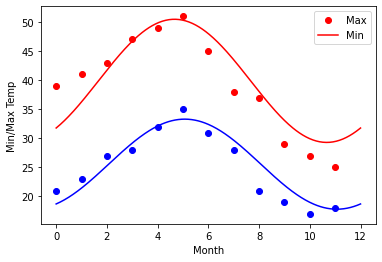

In [42]:
x = np.linspace(0, 12, 365)

plt.figure()
plt.plot(months, mon_max, 'ro')
plt.plot(x, temperature_per_month(x, *temp_max_res), 'r-')
plt.plot(months, mon_min, 'bo')
plt.plot(x, temperature_per_month(x, *temp_min_res), 'b-')
plt.xlabel('Month')
plt.ylabel('Min/Max Temp')
plt.legend(['Max', 'Min'])
plt.show()

Q2. This assignment is for visualization using matplotlib:
    
data to use: url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [44]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


array([<AxesSubplot:ylabel='sex'>], dtype=object)

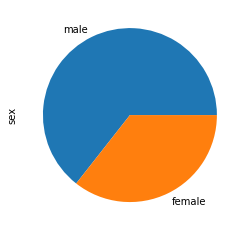

In [63]:
# Create a pie chart presenting the male/female proportion
titanic['sex'].value_counts().plot.pie(subplots = True)

<AxesSubplot:xlabel='fare', ylabel='age'>

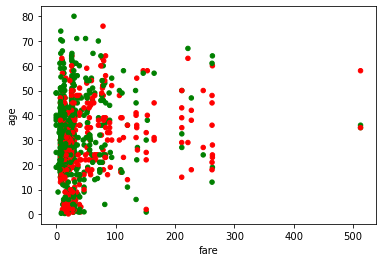

In [79]:
#Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
color = np.where(titanic['sex'] == 'female', 'r', 'g')
titanic.plot.scatter(x = 'fare', y = 'age', c = color)